<a href="https://colab.research.google.com/github/Troy0207/JiahaoChen-MIS64061/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

##1 Build the Model from Scratch

### 1)Download Data

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jiahaochen123","key":"5cc6a37d1d20508274a6ded0f45fcf3a"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats
!unzip -qq dogs-vs-cats.zip

 98% 792M/812M [00:03<00:00, 249MB/s]
100% 812M/812M [00:03<00:00, 230MB/s]


In [5]:
!unzip -qq train.zip

### 2)Data Preparation

In [6]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

### 3) Model Build

In [7]:

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### 4)Data Preprocessing

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


### 5）Model Fit

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 20s 142ms/step - loss: 0.7044 - accuracy: 0.4925 - val_loss: 0.7084 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 8s 125ms/step - loss: 0.6904 - accuracy: 0.5410 - val_loss: 3.7522 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 8s 126ms/step - loss: 0.7168 - accuracy: 0.6190 - val_loss: 0.6446 - val_accuracy: 0.6200
Epoch 4/30
63/63 [==============================] - 8s 125ms/step - loss: 0.6351 - accuracy: 0.6435 - val_loss: 0.6067 - val_accuracy: 0.6680
Epoch 5/30
63/63 [==============================] - 8s 127ms/step - loss: 0.5976 - accuracy: 0.6890 - val_loss: 0.6009 - val_accuracy: 0.6650
Epoch 6/30
63/63 [==============================] - 8s 126ms/step - loss: 0.5745 - accuracy: 0.7070 - val_loss: 0.5713 - val_accuracy: 0.6920
Epoch 7/30
63/63 [==============================] - 8s 124ms/step - loss: 0.5358 - accuracy: 0.7375 - val_loss: 0.6419 - val_accuracy: 0.6810
Epoch

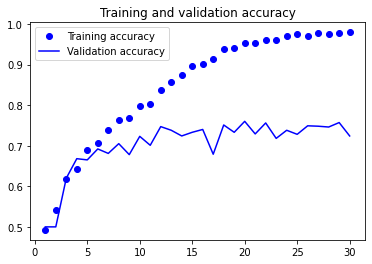

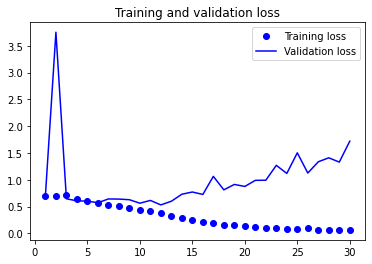

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 49ms/step - loss: 0.5743 - accuracy: 0.7320
Test accuracy: 0.732


These two graphs are characterized by overfitting, and the accuracy of our training has been increasing until it is close to 100%. In terms of the validation set, although dropout has been used to delay overfitting, the model is prone to overfitting due to too few training samples, so we need to increase the training samples (data augmentation).

### **6）**Data Augmentation

#### Big Training Sample(Without Augmentation)

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        if os.path.exists(dir):
         shutil.rmtree(dir)
         os.mkdir(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=3000)
make_subset("validation", start_index=3000, end_index=3500)
make_subset("test", start_index=3500, end_index=4000)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 6000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_big_sample.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
188/188 [==============================] - 22s 108ms/step - loss: 0.6951 - accuracy: 0.5467 - val_loss: 0.7474 - val_accuracy: 0.5270
Epoch 2/30
188/188 [==============================] - 21s 108ms/step - loss: 0.6643 - accuracy: 0.6245 - val_loss: 0.6024 - val_accuracy: 0.6660
Epoch 3/30
188/188 [==============================] - 21s 108ms/step - loss: 0.6014 - accuracy: 0.6868 - val_loss: 0.5915 - val_accuracy: 0.6710
Epoch 4/30
188/188 [==============================] - 21s 108ms/step - loss: 0.5441 - accuracy: 0.7180 - val_loss: 0.5266 - val_accuracy: 0.7270
Epoch 5/30
188/188 [==============================] - 21s 108ms/step - loss: 0.4811 - accuracy: 0.7720 - val_loss: 0.4581 - val_accuracy: 0.7880
Epoch 6/30
188/188 [==============================] - 21s 108ms/step - loss: 0.4408 - accuracy: 0.8000 - val_loss: 0.5440 - val_accuracy: 0.7690
Epoch 7/30
188/188 [==============================] - 21s 108ms/step - loss: 0.3946 - accuracy: 0.8228 - val_loss: 0.4929 - val_ac

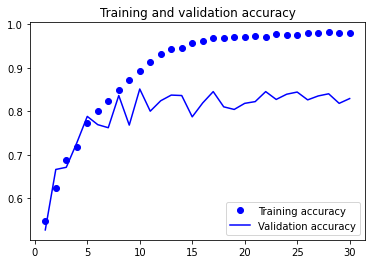

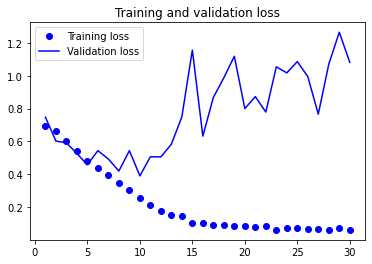

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch_big_sample.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 47ms/step - loss: 0.4886 - accuracy: 0.8120
Test accuracy: 0.812


We increased the size of the training set, trained the original model, and found that the degree of overfitting was reduced. And the prediction accuracy has been greatly improved.

#### With Data Augmentation

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        if os.path.exists(dir):
         shutil.rmtree(dir)
         os.mkdir(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 11s 137ms/step - loss: 7.7571 - accuracy: 0.4960 - val_loss: 0.6851 - val_accuracy: 0.5550
Epoch 2/100
63/63 [==============================] - 9s 133ms/step - loss: 0.7316 - accuracy: 0.5155 - val_loss: 0.6864 - val_accuracy: 0.5190
Epoch 3/100
63/63 [==============================] - 9s 135ms/step - loss: 0.7348 - accuracy: 0.5130 - val_loss: 0.6697 - val_accuracy: 0.5990
Epoch 4/100
63/63 [==============================] - 9s 136ms/step - loss: 0.6858 - accuracy: 0.5735 - val_loss: 0.7056 - val_accuracy: 0.5210
Epoch 5/100
63/63 [==============================] - 9s 134ms/step - loss: 0.6861 - accuracy: 0.5690 - val_loss: 0.7359 - val_accuracy: 0.5500
Epoch 6/100
63/63 [==============================] - 9s 134ms/step - loss: 0.7022 - accuracy: 0.6045 - val_loss: 0.6620 - val_accuracy: 0.6300
Epoch 7/100
63/63 [==============================] - 9s 133ms/step - loss: 0.6607 - accuracy: 0.6195 - val_loss: 0.6825 - val_accuracy: 0.558

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 48ms/step - loss: 0.8238 - accuracy: 0.7680
Test accuracy: 0.768


#### With Big Training Sample and Data Augmentation

In [8]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        if os.path.exists(dir):
         shutil.rmtree(dir)
         os.mkdir(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=3000)
make_subset("validation", start_index=3000, end_index=3500)
make_subset("test", start_index=3500, end_index=4000)

In [9]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 6000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [13]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_big_sample.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=60,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/60
188/188 [==============================] - 31s 99ms/step - loss: 3.0406 - accuracy: 0.5172 - val_loss: 0.6812 - val_accuracy: 0.5520
Epoch 2/60
188/188 [==============================] - 19s 98ms/step - loss: 0.6967 - accuracy: 0.5733 - val_loss: 0.6562 - val_accuracy: 0.6190
Epoch 3/60
188/188 [==============================] - 18s 95ms/step - loss: 0.6643 - accuracy: 0.6168 - val_loss: 0.6199 - val_accuracy: 0.6600
Epoch 4/60
188/188 [==============================] - 18s 96ms/step - loss: 0.6615 - accuracy: 0.6360 - val_loss: 0.6309 - val_accuracy: 0.6480
Epoch 5/60
188/188 [==============================] - 18s 96ms/step - loss: 0.6416 - accuracy: 0.6535 - val_loss: 0.6052 - val_accuracy: 0.6690
Epoch 6/60
188/188 [==============================] - 18s 95ms/step - loss: 0.6304 - accuracy: 0.6613 - val_loss: 0.5602 - val_accuracy: 0.7160
Epoch 7/60
188/188 [==============================] - 18s 95ms/step - loss: 0.6139 - accuracy: 0.6820 - val_loss: 0.5592 - val_accuracy:

In [14]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_big_sample.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 47ms/step - loss: 0.4169 - accuracy: 0.8320
Test accuracy: 0.832


From the above, data augmentation and directly increasing the training set model will reduce overfitting and improve regularization and the performance of the model on the training set. Jointly increasing the sample size and data augmentation will further weaken the overfitting and make the model perform better on the test set.

##2 Using a Pretrained Convnet

### 1）With no Data Augmentation and no big sample size

In [15]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        if os.path.exists(dir):
         shutil.rmtree(dir)
         os.mkdir(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


#### Using VGG16 

In [17]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [18]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [19]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 18.4427 - accuracy: 0.9175 - val_loss: 4.4860 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 2.9273 - accuracy: 0.9800 - val_loss: 3.5017 - val_accuracy: 0.9760
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 2.8086 - accuracy: 0.9815 - val_loss: 6.0408 - val_accuracy: 0.9670
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.4756 - accuracy: 0.9875 - val_loss: 6.5703 - val_accuracy: 0.9730
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6252 - accuracy: 0.9940 - val_loss: 9.8879 - val_accuracy: 0.9570
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.5262 - accuracy: 0.9950 - val_loss: 5.3019 - val_accuracy: 0.9730
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2030 - accuracy: 0.9975 - val_loss: 5.8839 - val_accuracy: 0.9700
Epoch 8/20
63/63 

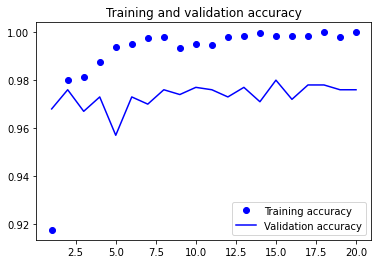

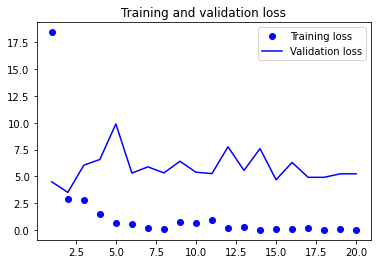

In [20]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

The results show high accuracy on the validation set, compared to the model from scratch. But it seems to be overfitting very quickly, although Dropout is also used.

###2) With Data Augumentation

In [21]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [22]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [23]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(512)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [24]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 24s 353ms/step - loss: 24.0650 - accuracy: 0.8995 - val_loss: 5.3240 - val_accuracy: 0.9720
Epoch 2/50
63/63 [==============================] - 22s 350ms/step - loss: 10.7105 - accuracy: 0.9380 - val_loss: 4.2910 - val_accuracy: 0.9760
Epoch 3/50
63/63 [==============================] - 22s 345ms/step - loss: 7.4948 - accuracy: 0.9535 - val_loss: 7.1961 - val_accuracy: 0.9690
Epoch 4/50
63/63 [==============================] - 22s 345ms/step - loss: 7.3509 - accuracy: 0.9565 - val_loss: 12.5983 - val_accuracy: 0.9540
Epoch 5/50
63/63 [==============================] - 22s 345ms/step - loss: 4.2452 - accuracy: 0.9680 - val_loss: 6.5708 - val_accuracy: 0.9730
Epoch 6/50
63/63 [==============================] - 22s 345ms/step - loss: 3.0664 - accuracy: 0.9735 - val_loss: 4.9833 - val_accuracy: 0.9750
Epoch 7/50
63/63 [==============================] - 22s 346ms/step - loss: 5.9693 - accuracy: 0.9630 - val_loss: 5.6040 - val_accuracy: 0.9

In [25]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 8s 216ms/step - loss: 3.3631 - accuracy: 0.9730
Test accuracy: 0.973


The accuracy on the test set is close to 97.5%, which is much better than the model trained from scratch.

#### Fine Tuning

In [26]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [27]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 26s 383ms/step - loss: 0.6987 - accuracy: 0.9930 - val_loss: 4.5614 - val_accuracy: 0.9780
Epoch 2/30
63/63 [==============================] - 24s 379ms/step - loss: 0.8586 - accuracy: 0.9895 - val_loss: 3.9634 - val_accuracy: 0.9810
Epoch 3/30
63/63 [==============================] - 24s 373ms/step - loss: 0.6386 - accuracy: 0.9915 - val_loss: 4.6233 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 24s 380ms/step - loss: 1.0260 - accuracy: 0.9880 - val_loss: 3.8693 - val_accuracy: 0.9800
Epoch 5/30
63/63 [==============================] - 24s 373ms/step - loss: 0.7464 - accuracy: 0.9915 - val_loss: 5.0549 - val_accuracy: 0.9770
Epoch 6/30
63/63 [==============================] - 24s 374ms/step - loss: 0.6146 - accuracy: 0.9915 - val_loss: 5.7505 - val_accuracy: 0.9770
Epoch 7/30
63/63 [==============================] - 24s 372ms/step - loss: 0.4947 - accuracy: 0.9915 - val_loss: 4.7588 - val_accuracy: 0.9810

In [28]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 8s 216ms/step - loss: 3.3909 - accuracy: 0.9760
Test accuracy: 0.976


## Summary

With these two different ways of building few-shot models, I found that Convolutional Neural Networks have a strong ability to learn or fit. When the training sample size is small, the more complex the model, the easier it is to overfit. Increasing the training sample size (data augmentation) can effectively reduce overfitting. If the accuracy of the validation set and test set cannot be effectively improved after increasing the effective sample size of the small sample training set, we may use other models trained with large samples and make slight improvements under this model to reduce overfitting and improve prediction accuracy.

# Idea of Final Project

At first, I still wanted to use a time series model for stock or index forecasting. If the results are not ideal, I will choose fraud detection as the content of my final project.